In [5]:
# from kears.datasets import mnist
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [6]:
# print(mnist.load_data)

11490434/11490434 [==============================] - 0s 0us/step


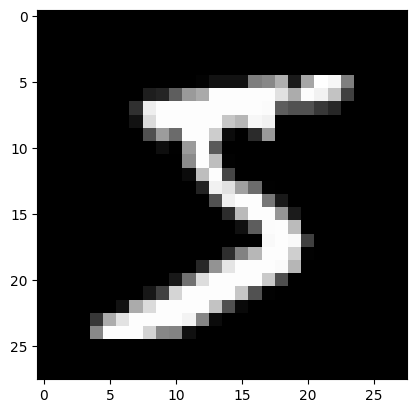

In [7]:
(X_train,y_train), (X_test, y_test)= mnist.load_data()
plt.subplot()
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))

In [8]:
pixel_numbers  = X_train.shape[1]*X_train.shape[1]
print(pixel_numbers)
X_train = X_train.reshape(X_train.shape[0],pixel_numbers).astype('float32')
X_test = X_test.reshape(X_test.shape[0],pixel_numbers).astype('float32')

784


In [9]:
X_train = X_train/255
X_test = X_test/255
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
num_classes=y_train.shape[1]
print(num_classes)

10


In [10]:
from keras.engine.sequential import input_layer
model  = Sequential()
model.add(Dense(pixel_numbers, input_dim=pixel_numbers,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=2)

Epoch 1/10
300/300 - 7s - loss: 0.2754 - accuracy: 0.9234 - val_loss: 0.1387 - val_accuracy: 0.9596 - 7s/epoch - 23ms/step
Epoch 2/10
300/300 - 6s - loss: 0.1112 - accuracy: 0.9679 - val_loss: 0.0940 - val_accuracy: 0.9699 - 6s/epoch - 19ms/step
Epoch 3/10
300/300 - 6s - loss: 0.0721 - accuracy: 0.9792 - val_loss: 0.0719 - val_accuracy: 0.9778 - 6s/epoch - 19ms/step
Epoch 4/10
300/300 - 5s - loss: 0.0504 - accuracy: 0.9856 - val_loss: 0.0741 - val_accuracy: 0.9769 - 5s/epoch - 16ms/step
Epoch 5/10
300/300 - 6s - loss: 0.0376 - accuracy: 0.9893 - val_loss: 0.0698 - val_accuracy: 0.9793 - 6s/epoch - 20ms/step
Epoch 6/10
300/300 - 5s - loss: 0.0274 - accuracy: 0.9925 - val_loss: 0.0637 - val_accuracy: 0.9812 - 5s/epoch - 16ms/step
Epoch 7/10
300/300 - 5s - loss: 0.0202 - accuracy: 0.9949 - val_loss: 0.0629 - val_accuracy: 0.9800 - 5s/epoch - 18ms/step
Epoch 8/10
300/300 - 5s - loss: 0.0154 - accuracy: 0.9964 - val_loss: 0.0634 - val_accuracy: 0.9797 - 5s/epoch - 17ms/step
Epoch 9/10
300/3

In [12]:
score= model.evaluate(X_test, y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

The error is: 1.74%


1/1 [==============================] - 0s 34ms/step
Predicted digit: 5


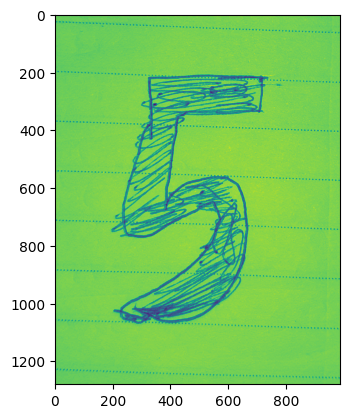

In [21]:
# import NumPy
from PIL import Image

input_image = Image.open('s.jpg').convert('L')  # Convert to grayscale
plt.plot()
plt.imshow(input_image)
input_image = input_image.resize((28, 28))  # Resize to 28x28 pixels
input_image = np.array(input_image)  # Convert to numpy array

# Reshape and normalize the input image
input_image = input_image.reshape(1, 784)  # Reshape to (1, 784)
input_image = input_image.astype('float32') / 255

# Make a prediction
predictions = model.predict(input_image)

# Interpret the prediction
predicted_digit = np.argmax(predictions)

print("Predicted digit:", predicted_digit)